In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('./diabetes.csv')
df = data.copy()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = data.Outcome
x = data.drop('Outcome', axis = 1)

In [ ]:
# Normalization
mean = x.mean(axis = 0)
x -= mean

std = x.std(axis = 0)
x /= std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [ ]:
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

print("\ny_train:\n")
print(y_train.head())
print(y_train.shape)

print("\ny_test:\n")
print(y_test.head())
print(y_test.shape)


X_train:

     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
436     2.420169  0.597557  ...                 -0.687765  0.659776
299     1.233077 -0.278192  ...                  1.111053  2.105325
270     1.826623 -0.622237  ...                  2.004426  0.404679
343     0.342757  0.034575  ...                 -0.548930 -0.020483
741    -0.250789 -0.590960  ...                 -0.216934 -0.615709

[5 rows x 8 columns]
(614, 8)

X_test:

     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
525    -0.250789 -1.060111  ...                 -0.084135 -1.040871
718    -0.844335 -0.403299  ...                 -0.171661 -0.785774
10      0.045984 -0.340746  ...                 -0.847727 -0.275580
460     1.529850 -0.027978  ...                  0.788111  1.255002
6      -0.250789 -1.341602  ...                 -0.675693 -0.615709

[5 rows x 8 columns]
(154, 8)

y_train:

436    0
299    0
270    1
343    0
741    0
Name: Outcome, dtype: int64
(614,)

y_test:



In [ ]:
COLUMNS = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                       'BMI', 'DiabetesPedigreeFunction', 'Age']

feature_columns = []

for feature_name in COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='Pregnancies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Glucose', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BloodPressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SkinThickness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='DiabetesPedigreeFunction', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(X_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi7tykvjy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn)  # train

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpi7tykvjy/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 101.877
INFO:tensorflow:loss = 0.3468257, step = 100 (0.985 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpi7tykvjy/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for final step: 0.4677347.


In [ ]:
result = linear_est.evaluate(test_input_fn)  # get model metrics/stats by testing on tetsing data

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-10T08:32:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi7tykvjy/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.39397s
INFO:tensorflow:Finished evaluation at 2022-02-10-08:32:37
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.73376626, accuracy_baseline = 0.66883117, auc = 0.7920236, auc_precision_recall = 0.61835754, average_loss = 0.52923757, global_step = 200, label/mean = 0.33116883, loss = 0.52879727, precision = 0.6086956, prediction/mean = 0.34985223, recall = 0.54901963
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpi7tykvjy/model.ckpt-200


In [ ]:
clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.73376626


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi7tykvjy/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


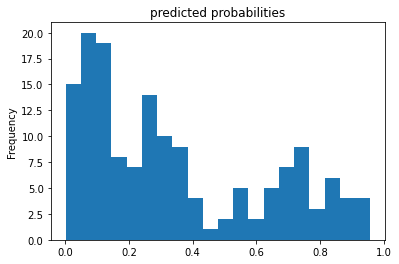

In [ ]:
pred_dicts = list(linear_est.predict(test_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')